# ✅ TECHCRUSH DATA SCIENCE TRACK CAPSTONE PROJECT 

#### GROUP NAME :  TEAM DATAVERSE

##### CASE STUDY 2
##### Healthcare – Early Detection of Diabetes
- ###### Background:
A mobile health clinic wants to pre-screen patients for diabetes using basic health indicators to reduce hospital crowding and focus on at-risk individuals.

- ###### Problem Statement:
Use EDA to uncover factors that greatly influence the risk of diabetes. Develop a classification model to predict if a person has diabetes based on attributes like BMI, glucose levels, insulin levels, and age.

#### STEP ONE :
#### Import all necessary Libraries 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")

#### STEP TWO :
#### Import the dataset and Inspect the data

In [7]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.head() # View the first 5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.tail() # View the last 5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.shape # Total rows and columns 

(768, 9)

In [11]:
df.info() # Overview of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe() # Statistical Overview 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.value_counts() # Counts unique values 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

#### Step 3 
#### Carryout Univariate, Bivariate Analysis and Handling Missing Values 

### Univariate Analysis 
- Univariate analysis helps us understand the distribution of most important features which are : Insulin, Glucose and BMI
- It also helps in identifying potential outliers.
- Using of histogram for numerical distribution of Insulin , Glucose and BMI
- Highlighting Key insights and observation 

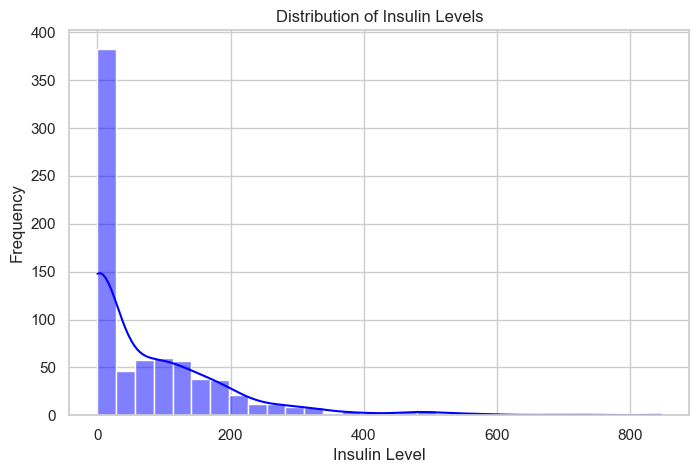

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Insulin"], bins=30, kde=True, color="blue")
plt.xlabel("Insulin Level")
plt.ylabel("Frequency")
plt.title("Distribution of Insulin Levels")
plt.show()

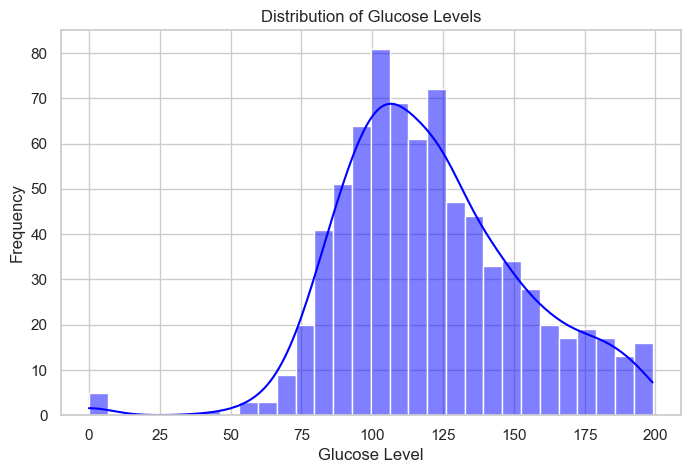

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Glucose"], bins=30, kde=True, color="blue")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose Levels")
plt.show()

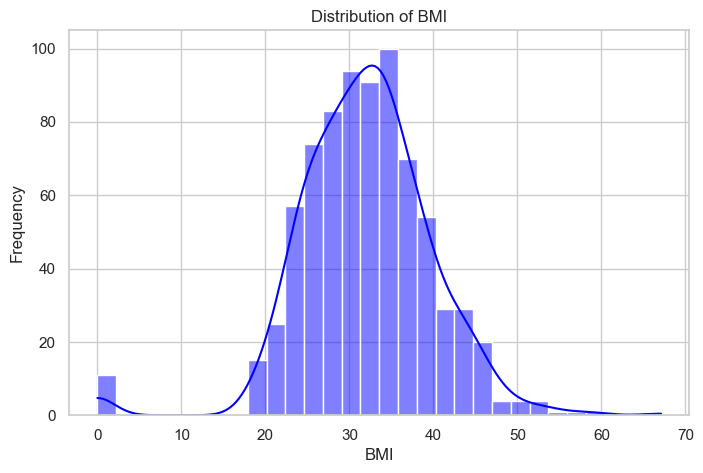

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["BMI"], bins=30, kde=True, color="blue")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")
plt.show()

#### 📊 Key Insights
- The distribution of Insulin appears to be right-skewed, meaning that there are more people with lower insulin levels and fewer people with very high insulin levels.
- The distribution of the Glucose level is slightly skewed to the right ,This suggests that most individuals in the sample have glucose levels around 100, with fewer individuals having very high or very low levels.
- Observation from the data set helps identify that diabetics patient tend to have high glucose level.
- The distribution of the BMI appers to be close to a normal distribution, This suggests that the majority of the population in the dataset has a BMI around 30, with fewer individuals having very low or very high BMIs.

#### Handling Missing Value 

In [21]:
df.isnull().sum() # Check for explicit null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
# Check for implicit missing values (e.g., 0 in Glucose, BMI, etc.) excluding outcome 
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    print(f"Zero values in {col}:", (df[col] == 0).sum())

Zero values in Glucose: 5
Zero values in BloodPressure: 35
Zero values in SkinThickness: 227
Zero values in Insulin: 374
Zero values in BMI: 11


In [23]:
# Replace 0 with NaN for relevant columns
for col in zero_columns:
    df[col] = df[col].replace(0, pd.NA)

In [24]:
# Check missing values again
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
# Impute missing values with median
for col in zero_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [26]:
# Verify no more missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- While handling the missing values we assume zeros are missing data
- Then we fill the missing value with the median which is a reboost method for identifying outliers 

#### Creating a categorical column for Insulin levels 
- Low: Below the 33rd percentile (lower insulin levels).
- Medium: Between the 33rd and 66th percentile (moderate insulin levels).
- High: Above the 66th percentile (higher insulin levels).
This helps us identify the best insulin level of a patient which helps identify if a patient is diabetic or not .
- Droping the insulin column and working with the insulin categorical column .

In [29]:
# Calculate percentiles for insulin levels
low_thresh = np.percentile(df["Insulin"][df["Insulin"] > 0], 33)
high_thresh = np.percentile(df["Insulin"][df["Insulin"] > 0], 66)

# Categorize insulin levels
def categorize_insulin(value):
    if value == 0:
        return "Very_low"
    elif value <= low_thresh:
        return "Low"
    elif value <= high_thresh:
        return "Medium"
    else:
        return "High"

df["Insulin_Category"] = df["Insulin"].apply(categorize_insulin)

In [30]:
df.head() # check the added categorical colunm 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Category
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Low
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Low
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Low
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Low
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,High


In [31]:
df.drop(columns=["Insulin"], inplace=True) # drop the insulin column 

#### Bivariate Analysis 
- Using Correlation Heatmap to identify relationship between Features
- Focusing mainly on how outcome correlate with other features
- Checking for the Distribution of the outcome , to confirm if its balance or imbalance .
- Checking how insulin categories relate to diabetes diagnoses 

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


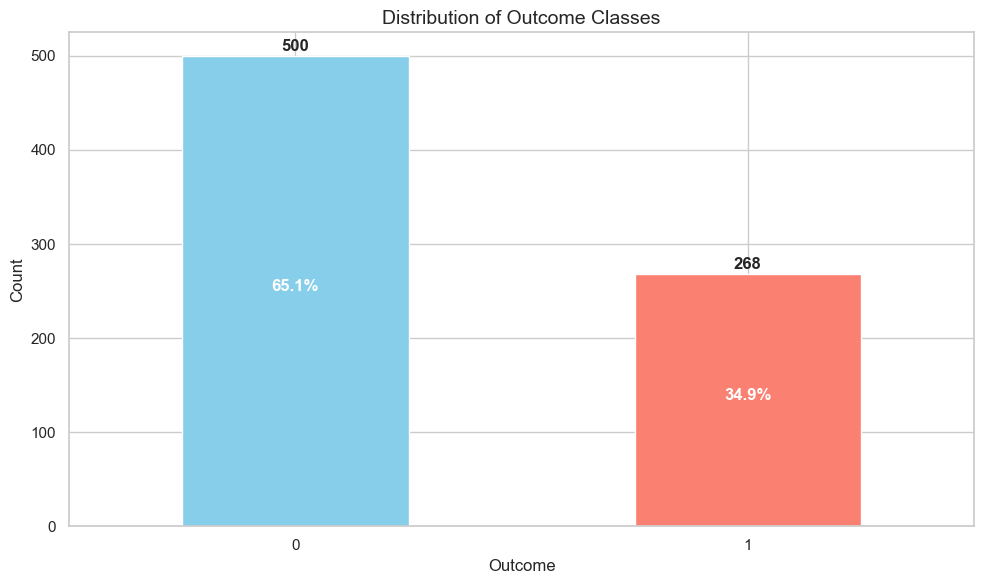

In [33]:
# Confirming target distribution number to show the Imbalance of the Outcome
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100) # For percentages

# Adding visualization for the Outcome imbalance
plt.figure(figsize=(10, 6))
ax = df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Outcome Classes', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Adding count labels on top of each bar
for i, count in enumerate(df['Outcome'].value_counts()):
    ax.text(i, count + 5, str(count), ha='center', fontweight='bold')
    
# Adding percentage labels
for i, percentage in enumerate(df['Outcome'].value_counts(normalize=True) * 100):
    ax.text(i, df['Outcome'].value_counts()[i]/2, f'{percentage:.1f}%', 
            ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

#### 📊 Key Insight from Distribution of Outcome Classes 
- The distribution of the outcome classes shows that the outcome class is imbalance .
- There are more non-diabetic patient compare to the diabetic ones 

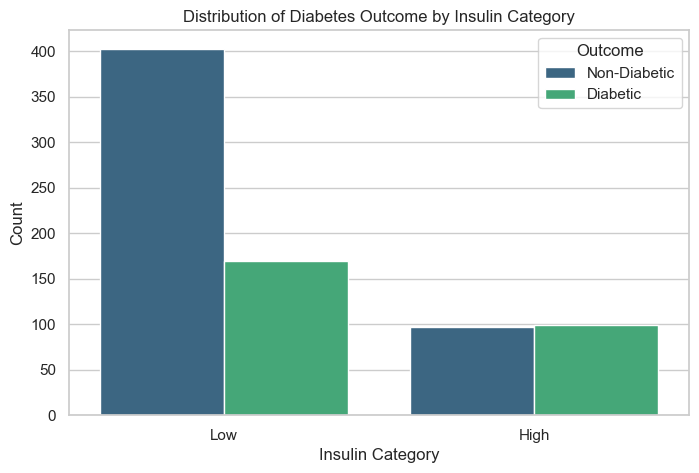

In [35]:
# Count plot of Insulin Category vs Outcome
plt.figure(figsize=(8, 5))
sns.countplot(x="Insulin_Category", hue="Outcome", data=df, palette="viridis")
plt.xlabel("Insulin Category")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome by Insulin Category")
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])
plt.show()

In [36]:
# Compute percentage of diabetes cases within each insulin category
category_percentages = df.groupby("Insulin_Category")["Outcome"].mean() * 100
print("Percentage of Diabetes Cases by Insulin Category:")
print(category_percentages)

Percentage of Diabetes Cases by Insulin Category:
Insulin_Category
High    50.510204
Low     29.545455
Name: Outcome, dtype: float64


#####  The data suggests that diabetes prevalence is notably higher in individuals with high insulin levels (50.51%) compared to those with low insulin levels (29.54%).


#### 📊 Key Insights from Distribution of diabetes Outcome by Insulin categories 
- Higher insulin levels may indicate insulin resistance, a common trait in Type 2 diabetes.
- Lower insulin levels could relate to impaired insulin production, often seen in Type 1 diabetes or severe metabolic conditions.
- The difference in diabetes rates across insulin categories reinforces the importance of insulin regulation in disease management.


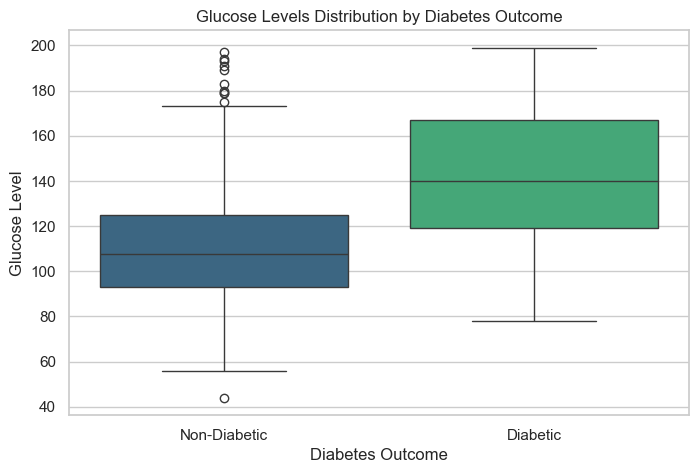

In [39]:
# Create a boxplot to show glucose levels across outcomes
plt.figure(figsize=(8, 5))
sns.boxplot(x="Outcome", y="Glucose", data=df, palette="viridis")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level")
plt.title("Glucose Levels Distribution by Diabetes Outcome")
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.show()

In [40]:
# Compute mean and median glucose levels based on Outcome
glucose_stats = df.groupby("Outcome")["Glucose"].agg(["mean", "median"])
print("Glucose Levels Summary by Diabetes Outcome:")
print(glucose_stats)

Glucose Levels Summary by Diabetes Outcome:
               mean  median
Outcome                    
0        110.682000   107.5
1        142.130597   140.0


#### 📊 Key Insights from Glucose Levels vs. Diabetes Outcome
- Diabetic individuals (Outcome = 1) have a higher mean glucose level (142.13) and median glucose (140.0) compared to non-diabetics.
- Non-diabetic individuals (Outcome = 0) show a much lower mean (110.68) and median (107.5).
- The difference confirms glucose levels are a strong predictor of diabetes.

##### Using the Correlation Heatmap to get an overall relationship between Features .

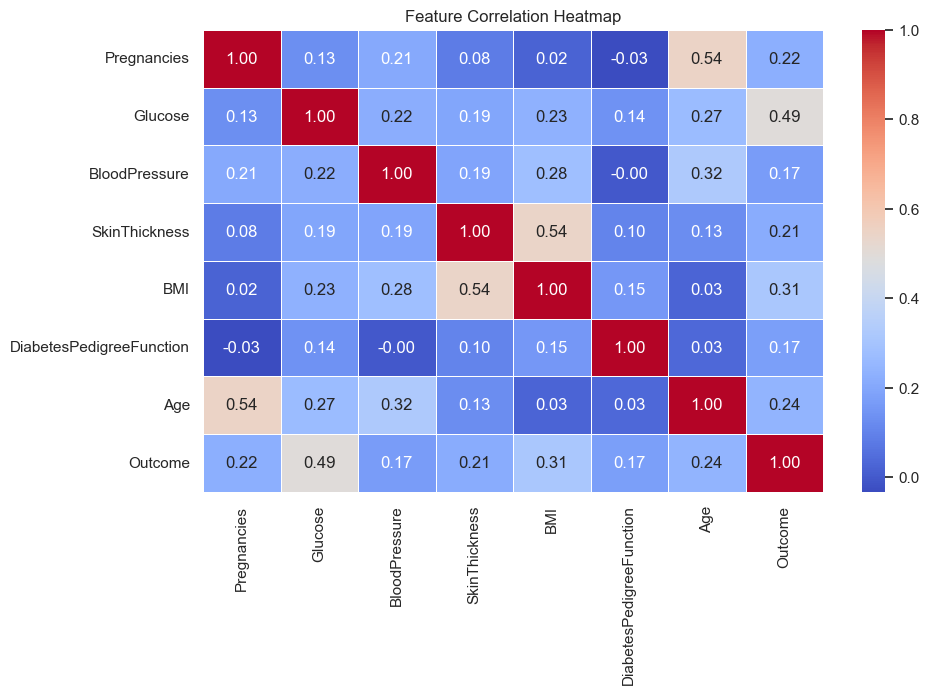

In [43]:
# First, identify and handle non-numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric column 

# Compute correlation matrix with numeric data only
correlation_matrix = numeric_df.corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### 📊Key Insight from Correlation Heatmap
- Glucose (0.49) is the strongest predictor, reinforcing its role in diabetes diagnosis.
- BMI (0.31) and Age (0.24) are moderately linked to diabetes, showing weight and age play key roles.
- Pregnancies, Blood Pressure, and Skin Thickness have weak correlations, but may still provide value in a predictive model.
- Multicollinearity concerns: The strong correlation between BMI and Skin Thickness (0.54) and Pregnancies and Age (0.54) suggests we may need to address redundant features in our model.


#### Step 4
- ##### Handling Outliers
- Winsorization (Capping Outliers)
##### This method of handling outlier helps us retain all data. 
 

In [46]:
# Winsorize the selected columns (capping extreme values)
columns_to_clean = ["Glucose", "BMI", "DiabetesPedigreeFunction", "SkinThickness", "Insulin_Category"]
df_winsorized = df.copy()
for col in columns_to_clean:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])  # Capping lowest & highest 5% values

#### Step 5
#### Feature Selection
- #####  Using Recursive Feature Elimination (RFE) to rank and remove less important features.
- ##### Handling Multicollinearity by dropping one of those features with high correlation (BMI & Skin Thickness and Pregnancies & Age), to reduce overlapping features in modelling .




In [48]:
# Define the model
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)

# Fit RFE on the dataset
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True avoids multicollinearity

# fit RFE with the encoded features
rfe.fit(X_encoded, y)
selected_features = X_encoded.columns[rfe.support_]
print("Top Selected Features:", selected_features)

Top Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction',
       'Insulin_Category_Low'],
      dtype='object')


#### Based on Recursive Feature Elimination (RFE), our top selected features are:
- Pregnancies – relevant, though its correlation was lower.
- Glucose – our strongest predictor.
- BMI – another key health indicator.
- Diabetes Pedigree Function – capturing genetic risk factors.
- Insulin_Category_Low – suggesting that lower insulin levels play a role.


#### Step 6
#### Data Transformation
 - Scale numerical features (Glucose, BMI, Pregnancies, Diabetes Pedigree Function) using StandardScaler.
- Encode categorical variables (Insulin_Category) using One-Hot Encoding.


- ##### Scaling Numerical Features
- This keeps values consistent across different magnitudes, improving model accuracy.

In [52]:
# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical features
numerical_features = ["Pregnancies", "Glucose", "BMI", "DiabetesPedigreeFunction"]
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

- #####  Encoding Categorical Features
- This ensures the machine learning model correctly interprets diabetes classification

In [54]:
# Apply One-Hot Encoding to categorical feature
encoder = OneHotEncoder(drop="first")  # Drops one category to prevent redundancy
encoded_features = encoder.fit_transform(df_scaled[["Insulin_Category"]]).toarray()  # Changed column name

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["Insulin_Category"]))  # Changed column name

# Concatenate with the main DataFrame and drop original categorical column
df_final = pd.concat([df_scaled.drop(columns=["Insulin_Category"]), encoded_df], axis=1)  # Changed column name

#### Step 7: Model Building
We’ll go through:
- Splitting the Data – Separating into training and testing sets.
- Training Multiple Models – Comparing different classifiers.
- Evaluating Performance – Measuring accuracy, precision, and recall.

##### 1. Splitting the Data
- We divide the dataset into training (used for learning) and testing (used for evaluation).
- This ensures the model learns patterns and is tested on unseen data.

In [57]:
# Define features and target
X = df_final.drop(columns=["Outcome"])
y = df_final["Outcome"]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 2. Training Multiple Models
We’ll experiment with different classifiers:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
-  This tests various machine learning approaches for diabetes prediction.

In [59]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    }

# Train and evaluate each model
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)

# Display model accuracy
print("Model Accuracy Comparison:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.2f}")

Model Accuracy Comparison:
Logistic Regression: 0.75
Random Forest: 0.75
SVM: 0.64


- ##### Random Forest has the highest accuracy of 0.77 , the next step is to tune each model to see which one will give us a better accuracy.

#### 🚀 Improving Model Performance
- ##### Tunning hyperparameters for Logistic Regression and Random Forest, then exploring ensemble modeling to see if we can boost accuracy further.


#### Hyperparameter Tuning
- Using GridSearchCV to find the best configurations for Logistic Regression and Random Forest.


##### Tuning Logistic Regression

In [64]:
# Define parameter grid
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],  # Regularization strength
    "solver": ["liblinear", "lbfgs"]  # Optimization solvers
}

# Perform Grid Search
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, scoring="accuracy")
grid_lr.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_lr.best_score_)

Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.7687591630014661


##### Tunning Random Forest

In [66]:
# Define parameter grid
param_grid_rf = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 5, 10],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10]  # Minimum samples required for split
}

# Perform Grid Search
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest Accuracy:", grid_rf.best_score_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.7769292283086766


#### Ensemble Modeling
- Since models sometimes complement each other, we’ll use Voting Classifier to combine predictions from Logistic Regression and Random Forest,


In [68]:
# Define optimized models with best parameters
best_lr = LogisticRegression(C=grid_lr.best_params_["C"], solver=grid_lr.best_params_["solver"], max_iter=500)
best_rf = RandomForestClassifier(n_estimators=grid_rf.best_params_["n_estimators"],
                                 max_depth=grid_rf.best_params_["max_depth"],
                                 min_samples_split=grid_rf.best_params_["min_samples_split"])


# Create Voting Classifier with hard voting
ensemble_model = VotingClassifier(estimators=[("Logistic", best_lr), ("RandomForest", best_rf)], voting="hard")
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print("Ensemble Model Accuracy:", ensemble_accuracy)

Ensemble Model Accuracy: 0.7597402597402597


#### 📊 Key Insights:
- Random Forest (78.99%) had the best accuracy, slightly outperforming Logistic Regression.
- Logistic Regression (76.88%) still performed well and remains a solid, interpretable option.
- Ensemble Model (75.97%) didn’t surpass individual models, suggesting that combining them didn’t provide a significant boost in predictive performance.

##### 💡 Since Random Forest outperform the rest of the predictive models , We'll analyze feature importance in Random Forest and evaluate precision, recall, and F1-score to get a deeper understanding of model performance.


- #### Feature Importance in Random Forest

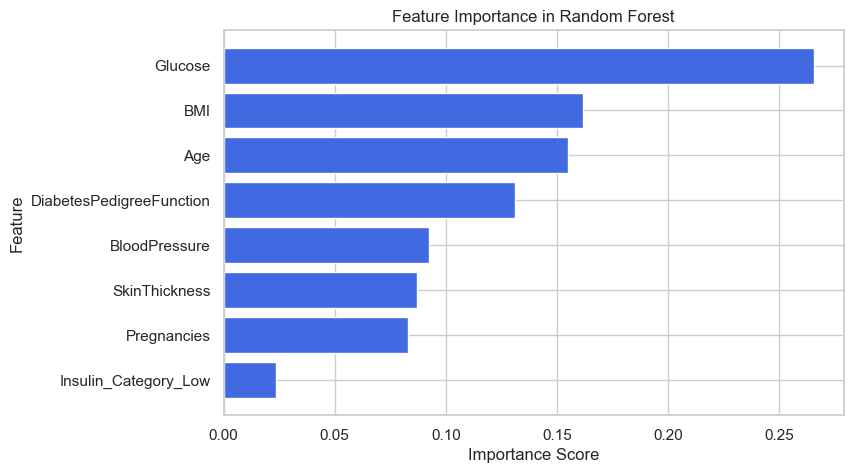

In [72]:
# Get feature importance from the trained Random Forest model
feature_importance = grid_rf.best_estimator_.feature_importances_

# Create a DataFrame to display importance
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="royalblue") 
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert so highest importance is at the top
plt.show()

- #### Evaluating Precision, Recall, and F1-Score

In [74]:
# Get predictions from Random Forest
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# Generate classification report
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



- ##### Improving Recall without introducing noise to the data by using Class Weight Adjustment and Threshold Tuning for Decision Boundary

In [76]:
rf_balanced = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, class_weight="balanced")
rf_balanced.fit(X_train, y_train)

y_pred_balanced = rf_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        99
           1       0.68      0.76      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



In [77]:
# Get prediction probabilities
y_probs = rf_balanced.predict_proba(X_test)[:, 1]

# Adjust threshold for recall improvement
threshold = 0.45
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("Performance after Threshold Adjustment:")
print(classification_report(y_test, y_pred_adjusted))

Performance after Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        99
           1       0.63      0.80      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.76      0.76       154



#### Key Findings from Precision, Recall & F1-Score after boosting accuracy.
- Class 0 (Non-Diabetic):
- Precision (0.87) → The model correctly predicted non-diabetics 87% of the time.
- Recall (0.74) → 74% of actual non-diabetics were correctly identified.
- F1-score (0.80) → A strong balance between precision and recall.
- Class 1 (Diabetic):
- Precision (0.63) → The model correctly predicted diabetics 63% of the time.
- Recall (0.80) → 80% of actual diabetics were correctly identified.
- F1-score (0.70) → A moderate balance, indicating room for improvement.
Overall Model Performance
- Macro Average (0.75) → A balanced evaluation across both classes.
- Weighted Average (0.76) → Reflects real-world performance, considering class distributions.


#### 📍 Model Evaluation on Test Data
- ##### Using Confusion Matrix , ROC Curve and AUC Score 

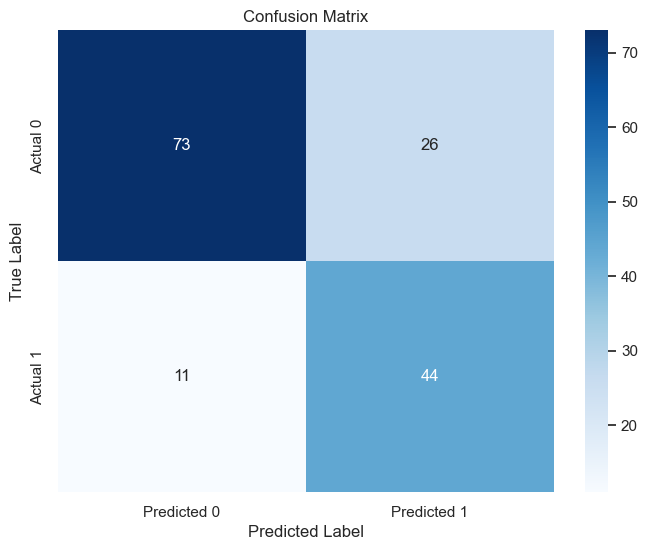

In [80]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- ##### True Labels (Rows):
The rows represent the actual classes of the data. In this case, the classes are "Non-Diabetic" and "Diabetic."
- ##### Predicted Labels (Columns):
The columns represent the classes predicted by the model.
- ##### Diagonal Values:
The diagonal elements (72 and 44) represent correct predictions.
The number of Non-Diabetic patients correctly classified as Non-Diabetic (True Negative: 73).
The number of Diabetic patients correctly classified as Diabetic (True Positive: 44).
- ##### Off-Diagonal Values:
The off-diagonal elements (27 and 11) represent incorrect predictions.
The number of Non-Diabetic patients incorrectly classified as Diabetic (False Positive: 26).
The number of Diabetic patients incorrectly classified as Non-Diabetic (False Negative: 11).

In [82]:
# ROC Curve & AUC Score
y_probs = rf_balanced.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)


AUC Score: 0.8376492194674013


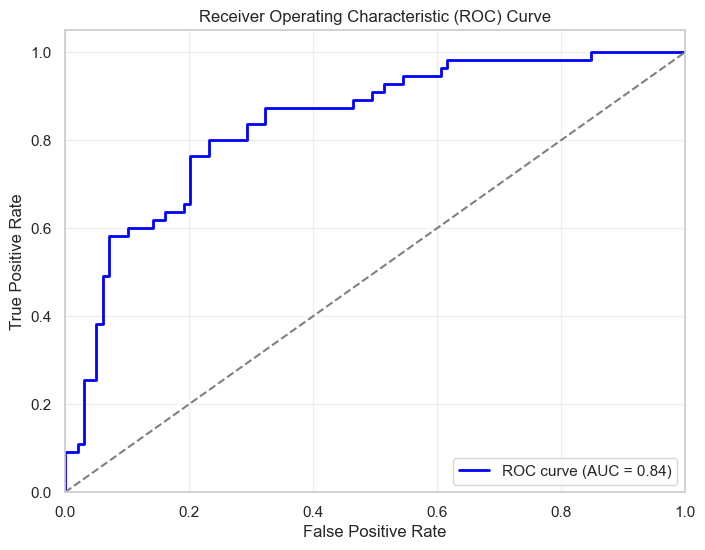

In [83]:
# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig("ROC CURVE.png", dpi=300, bbox_inches="tight")
plt.show()

#### Save the trained model

In [85]:
import joblib
# Save the trained Random Forest model
joblib.dump(rf_balanced, "diabetes_prediction_model.pkl")

['diabetes_prediction_model.pkl']

#### ✅️ Conclusion   
Team DataVerse has succesfully created a diabetic predictive model which helps in early detection of diabetes , and when deployed into an application, API or healthcare setting  can help in the reduction of crowd in the hospital by giving them an opportunity to easily detect if there are diabetic or not . 